# 합성곱 신경망
## - 케라스로 CNN 학습 수행

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

## 1) 데이터 준비 
- MNIST 데이터 불러오기

In [2]:
mnist = fetch_openml("mnist_784", version=1)

In [12]:
#원본 데이터 그려보기 - numpy.ndarray 타입이 아니라서 오류?
#type(mnist.data)
X = (mnist.data)
y = mnist.target.astype(np.int)

import matplotlib.pyplot as plt

pixels = X[0].reshape(28,28)

plt.imshow(pixels, cmap="gray")
#print(y[1])

#X[0], y[0] 값 바꿔서 확인해볼 수 있음 

AttributeError: 'Series' object has no attribute 'reshape'

- 데이터 전처리 후 분리

In [14]:
#데이터 전처리
X = (mnist.data/255).values.reshape(len(mnist.data),28,28,1)
y = to_categorical(mnist.target.astype(np.int),10)

#mnist.data/255 : 정규화 (0~1사이의 값으로 바꿔줌)-원본데이터가 0~255 로 이루어진 숫자 
#reshape : numpy계열의 차원과 크기 바꿔줌
#2차원데이터 형태 유지
#모양 바꿔줌 - 데이터 몇개인지, 형상정보: 가로 세로 나열해주고 , 채널정보

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

## 2) 인공신경망 모형 구성 
- Conv2D() : 합성곱층 쌓기
- MaxPooling2D() : 풀링층 쌓기

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),
                strides = (1,1),padding='Same',
                activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3),
                strides = (1,1),padding='Same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#합성곱층 쌓기 (필터개수:32, 필터크기:3x3, 스트라이드:3, input_shape : x데이터 feature 정보)
#합성곱층 한번 더 쌓기
#풀링(원본을 2x2로)

model.add(Conv2D(filters=64, kernel_size=(3,3),
                strides = (1,1),padding='Same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),
                strides = (1,1),padding='Same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#합성곱 두번->풀링한번

model.add(Flatten())
#1차원으로 변환

model.add(Dense(units=128, activation='relu'))
#은닉층 쌓기

model.add(Dropout(0.25))
#드롭아웃 수행

model.add(Dense(units=10, activation='softmax'))
#출력층 쌓기 


## 3) 모형의 학습 과정에 대한 설정
- compile()

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
#손실함수
#최적화 기법

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

## 4) 모형 학습

In [20]:
model.fit(X_train, y_train,
         epochs = 10,
         batch_size = 100,
         verbose=2)

Epoch 1/10
490/490 - 621s - loss: 0.2023 - accuracy: 0.9355
Epoch 2/10


KeyboardInterrupt: 

In [21]:
hist = model.fit(X_train, y_train , 
                epochs = 10,
                batch_size = 100,
                verbose=0,
                validation_data = (X_test,y_test))

In [22]:
hist.history['accuracy']

[0.9860612154006958,
 0.9903265237808228,
 0.992326557636261,
 0.9934694170951843,
 0.9945714473724365,
 0.9953673481941223,
 0.9955918192863464,
 0.9958979487419128,
 0.9966938495635986,
 0.9966734647750854]

In [23]:
hist.history['loss']

[0.045020125806331635,
 0.030002109706401825,
 0.02521945722401142,
 0.019091278314590454,
 0.01638774573802948,
 0.014808930456638336,
 0.01327560655772686,
 0.012095310725271702,
 0.01050177775323391,
 0.010646887123584747]

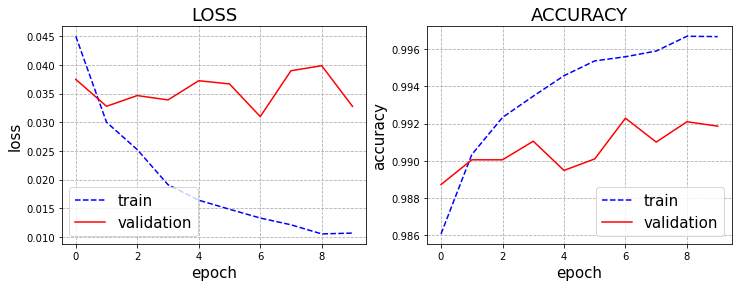

In [24]:
#그림그려보기
#hist.history
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))

plt.subplot(1,2,1) #1행2열로 그림 그리겠다-1번째에
plt.plot(hist.history["loss"],color="blue",linestyle="--",label="train")
plt.plot(hist.history["val_loss"],color="red",label="validation")
plt.xlabel("epoch",fontsize=15)
plt.ylabel("loss",fontsize=15)
plt.title("LOSS",fontsize=18)
plt.grid(linestyle="--")
plt.legend(fontsize=15, loc="best")

plt.subplot(1,2,2)
plt.plot(hist.history["accuracy"],color="blue",linestyle="--",label="train")
plt.plot(hist.history["val_accuracy"],color="red",label="validation")
plt.xlabel("epoch",fontsize=15)
plt.ylabel("accuracy",fontsize=15)
plt.title("ACCURACY",fontsize=18)
plt.grid(linestyle="--")
plt.legend(fontsize=15, loc="best")

## 5) 모형 성능 평가
- evaluate()

In [25]:
loss, acc = model.evaluate(X_test, y_test)
print("손실값:" , round(loss,3))
print("정확도:", round(acc,3))

657/657 [==============================] - 62s 93ms/step - loss: 0.0328 - accuracy: 0.9919
손실값: 0.033
정확도: 0.992


## 6) 임의 데이터에 대하여 모형 출력 확인
- 검증데이터 재사용

In [26]:
y_pred = model.predict(X_test)
print(y_pred[0:3])

[[5.8775565e-13 1.4856589e-14 1.3038444e-11 4.7411742e-15 7.4648178e-12
  7.8724179e-07 9.9999905e-01 1.3510239e-18 1.4320914e-07 4.1595816e-14]
 [3.8059045e-11 7.3183837e-10 9.9999237e-01 2.0077479e-08 3.8012905e-11
  3.2604020e-11 2.2190161e-11 1.1512144e-08 7.6458527e-06 1.5377758e-09]
 [7.9979589e-18 4.4950523e-09 1.0660279e-06 2.1351512e-12 2.0616032e-07
  2.8074022e-15 4.8369319e-16 9.9999869e-01 5.7760302e-14 1.8809692e-11]]


In [27]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[0:3])

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[6 2 7]
